In [154]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [155]:
data_path = "./Datas.csv"
df = pd.read_csv(data_path)
df

,karma,networkExp,bedwars_beds,bedwars_bedwars_challenger,bedwars_bedwars_killer,bedwars_collectors_edition,bedwars_level,bedwars_loot_box,bedwars_slumber_ticket_master,bedwars_wins,...,games_played_bedwars,games_played_bedwars_1,kills_bedwars,losses_bedwars,void_deaths_bedwars,void_final_deaths_bedwars,void_final_kills_bedwars,void_kills_bedwars,wins_bedwars,Cheat
0,695.0,5.923840e+05,160,0,410,278,13,12,0,40,...,257,258,681,217,266,50,65,221,40,0
1,5835.0,2.842790e+05,210,0,294,135,10,1,0,16,...,264,264,404,248,376,56,108,199,16,0
2,45.0,5.622610e+05,116,0,178,117,14,16,0,12,...,396,396,428,384,558,148,75,195,12,0
3,76995.0,9.876340e+05,64,0,177,38,7,5,0,21,...,153,154,246,125,195,14,31,102,21,0
4,1820.0,8.888700e+04,74,0,90,39,4,0,0,12,...,63,63,90,51,128,16,30,32,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,3053425.0,1.682049e+07,1,0,2,0,1,1,0,0,...,2,2,7,2,0,1,0,2,0,1
4503,1765435.0,2.905752e+07,1319,10,7493,3875,87,0,0,671,...,1897,1936,9761,1197,1676,526,1797,5267,671,1
4504,34210755.0,3.189074e+07,81,0,168,1,6,6,0,17,...,46,49,167,27,65,6,20,59,17,1
4505,945200.0,7.770330e+05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot: >

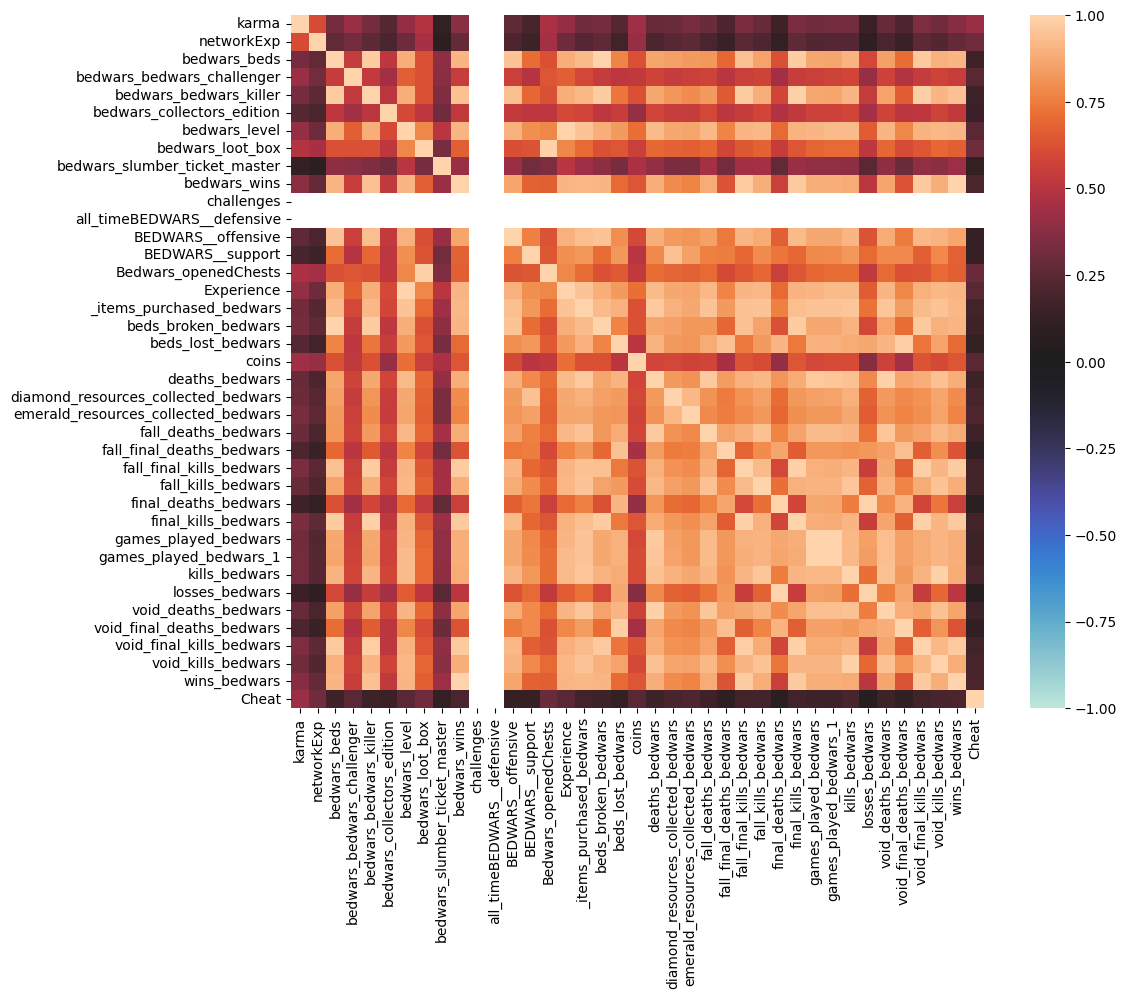

In [156]:
df_house_corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_house_corr, square=True, vmax=1, vmin=-1, center=0)

In [157]:
X = df.drop('Cheat', axis=1)
y = df['Cheat']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(500,500), max_iter=200)
model.fit(X_train_scaled, y_train)

# 訓練データの正解率
train_accuracy = model.score(X_train_scaled, y_train)
print(f'Training Accuracy: {train_accuracy}')

# テストデータの正解率
test_accuracy = model.score(X_test_scaled, y_test)
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9338659565024412
Testing Accuracy: 0.9112688553682342


In [158]:
# data = [[0,26770,19,0,25,4,2,0,0,7,0,0,6,1,0,2066,294,19,5,1012,6,41,6,0,1,1,0,5,26,12,12,7,5,5,0,6,0,7],
# [9900,964282,147,0,370,1023,29,19,0,34,0,0,14,160,57,132437,16722,147,813,81536,1898,5321,2266,47,14,11,67,921,370,957,957,2472,923,1026,328,123,783,34],
# [156390,943763,309,2,535,247,19,21,0,23,0,0,55,39,63,82408,10715,309,453,25809,1606,1333,483,39,14,9,34,543,317,604,700,758,581,901,160,86,286,23],
# [1485,1271535.0,86,0,430,560,25,19,0,56,0,0,10,159,54,111537,10813,86,473,52736,1274,5225,1171,36,16,6,24,491,224,566,569,1326,497,703,194,76,559,56],
# [58705,1532039.0,139,0,590,144,18,20,0,74,0,0,24,67,59,72793,4577,139,203,56156,973,1984,899,30,8,6,29,230,370,324,335,1014,237,429,57,93,437,74],
# [735,436149.0,110,0,320,64,13,1,0,31,0,0,22,21,0,56096,3683,110,189,36930,758,652,1022,9,3,1,13,187,164,219,219,534,183,362,80,47,255,31],
# [0,30868,26,0,68,8,2,0,0,6,0,0,7,1,0,1925,249,26,3,612,9,41,4,0,0,1,3,1,68,7,7,40,1,6,0,5,9,6],
# [5,74995.0,20,0,54,53,6,0,0,12,0,0,5,7,0,14028,1088,20,46,8998,134,219,81,4,0,2,2,50,49,59,59,122,47,84,18,8,24,12],
# [115885,1141497.0,271,0,580,265,15,14,0,36,0,0,64,47,35,64090,7843,271,360,12756,1151,1416,645,25,3,5,19,362,305,427,443,871,376,570,129,99,369,36],
# [43275,686458,108,1,273,168,12,4,0,83,0,0,27,12,12,47918,4252,108,39,81410,503,322,96,22,2,6,28,34,273,114,114,325,31,249,15,92,153,83],
# [36410,632665.0,257,0,539,148,11,15,0,48,0,0,63,40,42,45204,7118,255,150,19216,596,1234,663,19,5,6,15,175,355,226,235,539,177,320,53,119,207,48],
# [490,414719.0,68,0,450,1044,20,19,0,105,0,0,8,31,48,89538,6111,68,408,14195,2232,1082,555,50,11,10,26,419,242,540,594,1030,435,1364,169,66,393,105],
# [5,121678.0,22,0,68,20,4,3,0,5,0,0,5,3,9,6419,841,22,20,7647,93,143,47,0,0,0,1,23,36,30,30,106,24,56,7,14,39,5],
# [10,146812.0,48,0,100,21,5,0,0,22,0,0,14,7,0,12835,1191,48,32,18571,108,144,69,2,1,3,7,28,93,54,54,141,32,49,8,15,50,22],
# [36940,1080679.0,50,0,150,17,5,0,0,14,0,0,12,7,0,15358,1493,50,72,6230,177,256,52,3,0,5,3,69,107,85,89,159,69,75,19,23,57,14],
# [2050135,32785528.0,1556,30,4746,6382,143,165,0,680,0,0,209,260,476,691986,49102,1523,876,942793,4459,13434,7344,100,21,50,124,752,2759,1431,1643,4683,721,2587,326,774,1736,673],
# [19917800,90112043.0,366,0,494,488,33,80,0,94,0,0,19,21,214,154955,5632,362,260,368950,876,2406,1863,23,5,8,18,229,377,320,341,859,233,372,91,151,409,87],
# [10474095,37487604.0,352,0,1156,869,37,56,0,209,0,0,58,32,150,176035.0,11219,328,278,438369,1525,1746,1271,37,6,11,54,254,699,462,551,1747,266,850,99,238,811,196],
# [84293565,298977556.0,11108,30,20842,8006,792,579,63491,3092,0,0,1339,443,1646,3860982,176516,10985,4170,8104314,11656,30500,22591,273,93,320,333,2984,15526,5966,6838,13764,2918,6427,1268,4229,5101,3009],
# [13377655,101491251.0,6739,0,22279,4245,366,200,0,4083,0,0,1069,295,489,1779015,146311,6700,1815,1798079,16640,20825,10109,459,46,270,589,1315,13227,5504,5604,17207,1379,8776,541,4509,8001,4079],
# [26274744,135360623.0,700,0,1121,8,43,59,0,278,0,0,12,14,111,202564,18989,700,324,126064,1294,3476,1001,48,9,27,91,273,1067,575,579,2367,296,645,100,415,955,278],
# [65776440,88418176.0,1314,20,4491,4363,148,208,486,768,0,0,250,78,613,715984,33175,1283,915,874703,4486,4078,1907,138,33,61,160,821,2240,1542,1887,4190,816,2414,350,799,1983,699],
# [18488910,158434360.0,2962,30,12795,19003,610,583,625,3680,0,0,438,1789,1712,2960527,193986,2946,3831,3583622,23184,79363,21975,586,96,213,647,3453,7400,7541,7671,20564,3632,12820,1226,2371,9173,3676],
# [9147070,51881444.0,414,7,2116,508,89,92,25,416,0,0,46,170,279,433867,20527,414,652,666595,2944,10931,3751,93,19,33,147,570,1443,988,1095,4749,567,1618,224,518,2310,416],
# [21053620,37404988.0,6308,14,21337,31318,748,469,425,7350,0,0,982,306,1382,3638001,286611,6289,7608,2129826,48689,15654,12082,1774,208,352,963,6974,13230,14124,15050,22035,6547,20821,2184,5255,11474,7337],
# [65032705,237416783.0,151,0,1105,438,74,78,0,422,0,0,3,6,200,360411,25131,144,871,706988,3014,2381,1471,98,35,21,94,844,812,1279,1316,3078,830,1504,204,294,1325,420],
# [24306925,70186913.0,302,0,1177,775,118,118,0,522,0,0,28,109,343,563453,30702,302,649,756127,3311,4518,3091,162,28,36,56,623,691,1135,1610,1539,598,1934,262,327,737,522],
# [4660875,22999598.0,943,7,2256,3244,118,118,0,498,0,0,120,176,354,568925,55758,941,2198,321707,9700,7557,3253,211,57,42,113,2168,1151,2913,3152,3932,2317,5744,769,373,1783,497],
# [1036691,21641428.0,10,0,67,60,4,6,0,18,0,0,3,7,17,11383,964,10,37,14792,81,341,183,2,0,1,5,36,34,56,56,171,37,45,15,15,66,18],
# [1637355,6265760,6863,0,7678,2588,87,0,1380,1701,0,0,390,150,0,423037,75580,6807,760,833083,2651,12699,5196,69,11,174,139,178,7678,1866,1877,4104,175,1422,73,2055,1449,1700],
# [478191,69844375.0,10,0,126,22,12,45,0,36,0,0,1,37,128,51145,3878,10,106,117335,192,2657,840,2,2,1,10,96,83,139,144,450,99,125,39,35,209,36],
# [80162235,305197620.0,3484,7,10597,2591,263,380,199,1424,0,0,410,217,1114,1277844,84171,3399,2036,933010,12752,13391,6567,307,58,136,257,1805,6292,3297,3544,10689,1892,7816,822,2483,5596,1342],
# [34157915,343717753.0,5348,4,18810,4051,392,309,0,2849,0,0,785,457,726,1909411.0,134717,5301,2109,2336467,14712,22494,12838,588,74,279,555,1558,10365,4311,4538,13164,1526,6737,528,3914,6176,2773]]

data = [[310, 229430.0, 58, 0, 136, 91, 8, 5, 0, 20, 0, 0, 11, 17, 14, 29017, 4132, 58, 189, 16824, 463, 682, 155, 15, 5, 0, 5, 214, 98, 241, 242, 225, 220, 234, 60, 26, 67, 20],
[210, 428073.0, 117, 0, 192, 33, 11, 0, 0, 22, 0, 0, 27, 51, 0, 43280, 3985, 117, 187, 29180, 376, 1620, 1097, 3, 3, 2, 7, 188, 121, 241, 241, 570, 204, 235, 86, 31, 143, 22],
[100, 212476.0, 34, 0, 118, 53, 8, 8, 0, 20, 0, 0, 5, 37, 21, 28012, 2096, 34, 95, 1889, 222, 939, 414, 2, 3, 2, 3, 99, 62, 125, 125, 224, 103, 106, 31, 16, 61, 20],
[375, 581370.0, 33, 0, 141, 231, 9, 11, 0, 20, 0, 0, 5, 36, 33, 36527, 2519, 33, 134, 46902, 495, 915, 611, 8, 0, 3, 8, 155, 83, 182, 184, 354, 161, 292, 48, 24, 121, 20],
[10, 438552.0, 33, 0, 156, 163, 9, 0, 0, 33, 0, 0, 9, 49, 0, 34605, 4065, 32, 86, 31046, 206, 1578, 429, 8, 3, 4, 6, 99, 144, 133, 133, 291, 99, 88, 31, 51, 155, 33],
[305, 239768.0, 22, 0, 119, 0, 8, 6, 0, 12, 0, 0, 3, 29, 11, 31767, 1638, 22, 82, 69524, 564, 977, 499, 9, 0, 0, 4, 90, 62, 114, 115, 304, 93, 324, 50, 31, 170, 12],
[705, 597236.0, 348, 0, 483, 487, 25, 3, 0, 38, 0, 0, 43, 64, 9, 116643, 18185, 347, 912, 85080, 1963, 2426, 1618, 78, 54, 4, 34, 900, 299, 987, 990, 1111, 948, 1190, 360, 89, 453, 38],
[7860, 1841939.0, 410, 0, 938, 2888, 76, 5, 25, 227, 0, 0, 58, 36, 0, 367869, 34546, 410, 1984, 211064, 5622, 1751, 3137, 177, 65, 18, 101, 2039, 533, 2417, 2519, 2912, 2133, 3193, 731, 168, 1276, 227],
[105, 359985.0, 44, 0, 96, 125, 10, 12, 0, 18, 0, 0, 7, 42, 35, 39268, 3092, 44, 156, 6664, 484, 1290, 556, 5, 1, 0, 14, 171, 66, 203, 204, 388, 178, 252, 60, 20, 149, 18],
[225100, 1233579.0, 733, 3, 1484, 565, 32, 33, 0, 86, 0, 0, 179, 55, 93, 149597, 21640, 730, 808, 21103, 2688, 2104, 491, 69, 17, 18, 46, 837, 810, 969, 1075, 1380, 883, 1586, 286, 219, 504, 86],
[45, 562261, 116, 0, 178, 117, 14, 16, 0, 12, 0, 0, 9, 15, 45, 60680, 7450, 116, 366, 49780, 983, 689, 450, 35, 8, 1, 6, 386, 178, 396, 396, 428, 384, 558, 148, 75, 195, 12],
[15, 440075.0, 100, 0, 160, 781, 17, 20, 0, 30, 0, 0, 14, 61, 58, 72380, 4803, 100, 343, 38169, 2066, 1866, 1075, 17, 4, 4, 10, 1161, 157, 1251, 1295, 562, 1149, 704, 141, 41, 181, 30],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 24432, 16, 0, 65, 3, 3, 0, 0, 11, 0, 0, 3, 0, 0, 2105, 223, 16, 4, 5951, 7, 2, 0, 0, 0, 0, 0, 2, 65, 13, 13, 21, 2, 2, 1, 13, 3, 11],
[1840, 447762.0, 190, 0, 418, 72, 11, 6, 0, 34, 0, 0, 54, 19, 17, 46932, 7892, 190, 176, 8686, 660, 648, 274, 18, 9, 4, 16, 173, 245, 219, 222, 452, 185, 396, 57, 88, 178, 34],
[1075, 275490.0, 43, 0, 142, 83, 13, 2, 0, 24, 0, 0, 4, 54, 0, 56327, 5180, 43, 243, 30050, 475, 1816, 507, 17, 6, 4, 13, 255, 92, 279, 280, 555, 255, 272, 93, 25, 217, 24],
[2135, 230420.0, 24, 1, 136, 205, 8, 5, 0, 33, 0, 0, 4, 7, 15, 29271, 2113, 24, 117, 10074, 629, 246, 66, 16, 4, 0, 13, 118, 70, 170, 171, 339, 127, 377, 30, 27, 164, 33],
[6015, 129998.0, 16, 0, 59, 178, 6, 6, 0, 8, 0, 0, 0, 18, 15, 21696, 1534, 16, 103, 4791, 348, 526, 88, 9, 2, 0, 3, 105, 31, 119, 119, 164, 111, 208, 52, 11, 79, 8],
[80, 270751.0, 121, 0, 195, 253, 10, 35, 0, 14, 0, 0, 18, 54, 105, 38650, 5517, 121, 349, 64730, 734, 1551, 638, 18, 7, 0, 8, 358, 139, 382, 382, 273, 368, 493, 114, 21, 87, 14],
[208075, 712441, 187, 0, 757, 514, 29, 2, 0, 97, 0, 0, 24, 21, 0, 133575, 16155, 187, 1036, 62319, 3581, 950, 215, 115, 32, 8, 91, 1211, 466, 1332, 1333, 2263, 1233, 1992, 407, 156, 1036, 97],
[3450, 455045, 77, 2, 133, 143, 10, 11, 0, 24, 0, 0, 19, 23, 33, 37013, 5818, 77, 136, 25317, 534, 734, 515, 10, 10, 2, 6, 143, 133, 167, 167, 326, 143, 297, 53, 41, 179, 24],
[0, 515915.0, 92, 0, 273, 162, 13, 13, 0, 30, 0, 0, 16, 36, 17, 56918, 4817, 92, 173, 8163, 494, 1253, 492, 18, 7, 3, 8, 170, 155, 205, 271, 535, 175, 267, 49, 34, 196, 30],
[60, 65074.0, 30, 0, 80, 9, 4, 1, 0, 20, 0, 0, 9, 1, 0, 11220, 1264, 29, 34, 3999, 128, 74, 48, 4, 1, 0, 1, 37, 81, 59, 59, 97, 38, 66, 19, 17, 25, 20],
[0, 169034.0, 14, 0, 79, 104, 8, 0, 0, 19, 0, 0, 5, 33, 0, 30294, 2316, 14, 154, 15962, 382, 958, 195, 4, 0, 1, 2, 163, 69, 182, 182, 134, 163, 187, 60, 8, 51, 18],
[0, 13966, 0, 0, 2, 155, 4, 1, 0, 3, 0, 0, 0, 3, 0, 9898, 747, 0, 37, 1470, 143, 110, 69, 0, 2, 0, 0, 42, 1, 46, 46, 27, 43, 88, 14, 1, 16, 3],
[227805, 322966.0, 78, 0, 244, 155, 11, 6, 0, 15, 0, 0, 10, 19, 17, 43841, 5225, 78, 310, 17020, 948, 850, 523, 4, 5, 0, 10, 334, 139, 360, 364, 616, 344, 586, 123, 37, 256, 15],
[37635, 349349.0, 124, 0, 444, 250, 10, 0, 0, 23, 0, 0, 28, 26, 0, 39279, 4289, 124, 224, 18973, 698, 843, 209, 15, 7, 2, 13, 237, 249, 259, 264, 504, 236, 397, 71, 75, 231, 23],
[0, 48189, 18, 0, 22, 12, 3, 0, 0, 3, 0, 0, 5, 0, 0, 2825, 359, 18, 10, 574, 63, 8, 0, 0, 0, 0, 0, 29, 23, 38, 38, 15, 35, 36, 2, 2, 3, 3],
[113895, 730453, 411, 0, 707, 162, 14, 0, 0, 52, 0, 0, 101, 21, 0, 57405, 12821, 408, 310, 46541, 1144, 757, 226, 38, 13, 8, 21, 353, 442, 433, 465, 700, 381, 656, 113, 127, 284, 52],
[15, 45906, 11, 0, 14, 8, 3, 2, 0, 3, 0, 0, 3, 2, 4, 4243, 346, 11, 12, 1038, 45, 61, 33, 0, 0, 0, 0, 12, 14, 22, 31, 43, 19, 26, 6, 2, 7, 3],
[20, 337780, 43, 0, 115, 160, 10, 9, 0, 31, 0, 0, 9, 42, 27, 38876, 4111, 43, 139, 6458, 527, 1472, 521, 7, 3, 0, 13, 141, 115, 169, 169, 583, 138, 280, 50, 28, 200, 31],
[200, 271793.0, 3, 0, 11, 0, 3, 3, 0, 4, 0, 0, 0, 7, 6, 6307, 354, 3, 14, 16790, 53, 140, 38, 0, 2, 2, 2, 14, 7, 18, 18, 67, 14, 35, 3, 1, 38, 4],
[3315, 645017.0, 90, 0, 292, 403, 15, 2, 0, 56, 0, 0, 14, 28, 3, 62428, 8842, 90, 352, 24459, 831, 1753, 1422, 16, 6, 3, 29, 348, 210, 445, 447, 1005, 389, 421, 129, 63, 347, 56],
[2065, 266798.0, 152, 0, 502, 188, 8, 1, 0, 30, 0, 0, 43, 26, 0, 28775, 4433, 152, 122, 64799, 446, 775, 243, 4, 1, 1, 11, 121, 255, 159, 159, 486, 129, 242, 38, 64, 163, 30],
[260, 471463.0, 14, 0, 81, 39, 12, 3, 0, 37, 0, 0, 0, 38, 6, 50289, 3049, 14, 187, 88067, 388, 1383, 315, 6, 1, 1, 3, 186, 41, 222, 231, 357, 180, 219, 77, 11, 154, 37],
[45, 312900.0, 67, 0, 72, 878, 9, 11, 0, 24, 0, 0, 9, 45, 26, 35961, 3600, 67, 154, 23614, 449, 1155, 201, 6, 2, 1, 2, 163, 39, 186, 186, 82, 162, 240, 58, 11, 40, 24],
[505245, 4969302.0, 623, 2, 1549, 1818, 116, 114, 0, 342, 0, 0, 81, 178, 338, 554290, 44042, 623, 1939, 224830, 6142, 6033, 3241, 366, 60, 38, 187, 2059, 949, 2473, 3158, 2713, 2130, 3256, 587, 343, 1077, 342],
[1795, 108563.0, 11, 0, 35, 43, 5, 4, 0, 11, 0, 0, 2, 5, 9, 13882, 1586, 11, 48, 12705, 191, 179, 166, 6, 1, 0, 8, 55, 26, 66, 69, 143, 55, 92, 15, 6, 42, 11],
[6595, 1040352.0, 319, 0, 640, 163, 10, 9, 0, 59, 0, 0, 88, 55, 27, 41587, 7163, 317, 160, 127861, 501, 1587, 232, 5, 2, 6, 12, 141, 356, 227, 228, 551, 167, 302, 53, 93, 187, 59],
[184570, 1401492.0, 412, 0, 787, 481, 26, 34, 0, 131, 0, 0, 102, 86, 101, 114350, 18358, 408, 488, 28769, 1880, 2625, 1040, 56, 13, 13, 39, 479, 508, 667, 689, 1164, 529, 1131, 219, 125, 390, 131],
[416155, 1766664.0, 348, 0, 1283, 670, 26, 27, 0, 129, 0, 0, 68, 48, 72, 120074, 16847, 348, 583, 19551, 1383, 1738, 744, 52, 14, 18, 42, 562, 662, 729, 730, 1629, 598, 658, 203, 182, 511, 129],
[3085, 352587.0, 5, 0, 26, 10, 6, 1, 0, 12, 0, 0, 1, 6, 0, 10481, 906, 4, 64, 2395, 140, 365, 58, 4, 1, 0, 1, 64, 25, 92, 96, 45, 76, 79, 33, 6, 18, 12],
[20, 113629.0, 34, 0, 88, 45, 6, 0, 0, 17, 0, 0, 9, 12, 0, 18810, 2338, 33, 79, 9824, 306, 332, 238, 5, 3, 1, 11, 96, 73, 115, 115, 161, 97, 132, 19, 16, 34, 17],
[87250, 799219.0, 121, 0, 404, 203, 13, 14, 0, 53, 0, 0, 19, 17, 42, 53559, 6253, 121, 251, 9288, 937, 819, 401, 24, 2, 2, 24, 256, 209, 330, 337, 736, 276, 429, 78, 60, 287, 53],
[244030, 1024839.0, 134, 0, 377, 292, 18, 0, 0, 80, 0, 0, 26, 52, 0, 78037, 8359, 134, 231, 63103, 1230, 1453, 1113, 51, 9, 6, 19, 250, 206, 330, 332, 488, 250, 770, 94, 73, 212, 80],
[3915, 433755.0, 58, 0, 403, 395, 11, 13, 0, 84, 0, 0, 5, 28, 38, 46044, 3593, 58, 105, 49029, 599, 807, 797, 12, 1, 2, 17, 106, 214, 199, 200, 714, 112, 319, 33, 61, 281, 84],
[0, 12553, 28, 0, 63, 17, 3, 1, 0, 13, 0, 0, 2, 1, 0, 4481, 926, 28, 40, 1122, 69, 40, 10, 0, 1, 1, 1, 47, 63, 56, 56, 52, 43, 20, 9, 11, 5, 13],
[9480, 221065.0, 35, 0, 145, 1, 5, 3, 0, 11, 0, 0, 6, 18, 3, 15802, 2427, 35, 80, 4350, 217, 599, 320, 5, 3, 1, 2, 81, 92, 104, 104, 221, 91, 118, 26, 22, 81, 11],
[25200, 98258.0, 8, 0, 44, 25, 4, 0, 0, 5, 0, 0, 0, 4, 0, 7370, 818, 8, 47, 1852, 125, 149, 39, 3, 1, 0, 2, 53, 37, 60, 60, 75, 55, 49, 16, 6, 21, 5],
[4538145, 3602911, 159, 0, 518, 956, 40, 33, 350, 115, 0, 0, 20, 45, 96, 189660, 24762, 159, 967, 34175, 2944, 1717, 1272, 130, 62, 20, 124, 993, 518, 1099, 1158, 2365, 980, 1535, 261, 171, 919, 115],
[4870, 698922.0, 115, 0, 260, 327, 19, 0, 0, 28, 0, 0, 17, 50, 0, 82131, 5939, 115, 527, 43738, 1142, 1733, 435, 31, 4, 0, 14, 527, 133, 571, 598, 517, 539, 568, 166, 34, 175, 28],
[113815, 2866852.0, 563, 0, 1558, 454, 35, 40, 0, 104, 0, 0, 116, 173, 117, 162335, 24604, 561, 737, 21257, 2614, 5490, 1187, 41, 26, 13, 75, 745, 811, 955, 956, 2559, 832, 1456, 263, 193, 846, 104],
]
columns = ['karma', 'networkExp', 'bedwars_beds', 'bedwars_bedwars_challenger', 'bedwars_bedwars_killer', 'bedwars_collectors_edition', 'bedwars_level', 'bedwars_loot_box', 'bedwars_slumber_ticket_master', 'bedwars_wins', 'challenges', 'all_timeBEDWARS__defensive', 'BEDWARS__offensive', 'BEDWARS__support', 'Bedwars_openedChests', 'Experience', '_items_purchased_bedwars', 'beds_broken_bedwars', 'beds_lost_bedwars', 'coins', 'deaths_bedwars', 'diamond_resources_collected_bedwars', 'emerald_resources_collected_bedwars', 'fall_deaths_bedwars', 'fall_final_deaths_bedwars', 'fall_final_kills_bedwars', 'fall_kills_bedwars', 'final_deaths_bedwars', 'final_kills_bedwars', 'games_played_bedwars', 'games_played_bedwars_1', 'kills_bedwars', 'losses_bedwars', 'void_deaths_bedwars', 'void_final_deaths_bedwars', 'void_final_kills_bedwars', 'void_kills_bedwars', 'wins_bedwars']
X_test_scaled = pd.DataFrame(data, columns=columns)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_scaled)
X_test_scaled

array([[-0.21424884, -0.46413166, -0.43601383, ..., -0.47824748,
        -0.5997629 , -0.41794567],
       [-0.21440865, -0.24479984, -0.08638225, ..., -0.40527545,
        -0.33730437, -0.38414602],
       [-0.21458445, -0.48285143, -0.57823685, ..., -0.62419155,
        -0.62048331, -0.41794567],
       ...,
       [ 7.0378636 ,  3.26069995,  0.16250803, ...,  1.63794149,
         2.34253536,  1.18753768],
       [-0.2069613 ,  0.05425829, -0.09823417, ..., -0.36149223,
        -0.22679552, -0.28274707],
       [-0.03285153,  2.44797985,  2.55659549, ...,  1.95901843,
         2.09043703,  1.00163961]])

In [159]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1])